# Importing libraries

In [1]:
import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
os.chdir(r"C:\Users\harsh\Desktop\harsh jain")
print(os.getcwd())

C:\Users\harsh\Desktop\harsh jain


# loading data

In [3]:
train = pd.read_csv("train_cab.csv",na_values={"pickup_datetime":"43"})
test = pd.read_csv("test.csv")

# data understanding

In [4]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [6]:
train.shape  #for finding rows and column

(16067, 7)

In [7]:
test.shape  #for finding rows and column

(9914, 6)

In [8]:
print(train.dtypes)
print("-----------------------------------------")
print(test.dtypes)

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object
-----------------------------------------
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


here data type of amount in train and datetime is of object type so we need to change these to particular formats

# First we need to clean our data and analyse if there are any missing values or not

In [9]:
train.describe() #describe function describe all statics of data

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [10]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# changing data types to correct format

In [11]:
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [12]:
print(train.dtypes)
print("---------------------------------")
print(test.dtypes)

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object
---------------------------------
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object


In [13]:
train.dropna(subset= ["pickup_datetime"]) #dropping null value 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00,-73.957027,40.765945,-73.981983,40.779560,1.0


In [14]:
# putting year, month , date , day , hour and min of both test and train data set in different column
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [15]:
test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [16]:
# rechecking data tyes 
print(train.dtypes)
print("-----------------------------------------")
print(test.dtypes)

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object
-----------------------------------------
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object


In [17]:
# removing null value from datetime 
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


Observations :
An outlier in pickup_datetime column of value 43

Passenger count should not exceed 6(even if we consider SUV)

Latitudes range from -90 to 90. Longitudes range from -180 to 180

Few missing values and High values of fare and Passenger count are present. So, decided to remove them.
Checking the Datetime Variable 

In [18]:
train["passenger_count"].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

maximum number of passanger count is 5345 which is actually not possible. So reducing the passenger count to 6 (even if we consider the SUV)
and also removing passenger count with value 0.

In [19]:
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [20]:
train["passenger_count"].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [21]:
train["passenger_count"].sort_values(ascending= True)

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [22]:
#we have to remove passanger_count missing values rows
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 13)
0


we aslo have to remove fraction values from passenger_count i.e. 0.12 because count should be 1 or more then 1

In [23]:
train = train.drop(train[train["passenger_count"] == 0.12 ].index, axis=0)
train.shape

(15933, 13)

In [24]:
# we will put fare_amount in decending order to know whether the outliers are present or not
train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [25]:
Counter(train["fare_amount"]<0)

Counter({False: 15930, True: 3})

In [26]:
train = train.drop(train[train["fare_amount"]<0].index, axis=0)
train.shape

(15930, 13)

checking if there anynegative value in fare or not

In [27]:
train["fare_amount"].min()

0.0

In [28]:
#Also remove the row where fare amount is zero
train = train.drop(train[train["fare_amount"]<1].index, axis=0)
train.shape

(15928, 13)

In [29]:
#decending order of fare amount helped us to find the outlier value i.e. 454 so we will remove the rows having fare_amount more than 454.
train = train.drop(train[train["fare_amount"]> 454 ].index, axis=0)
train.shape

(15926, 13)

In [30]:
# we will also remove rows which is having missing Fare_amount
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15902, 13)
0


no we have to  check pickup  latitude and longitude and drop_off latitude and longitude

In [31]:
#Lattitude----(-90 to 90) and Longitude----(-180 to 180) dropping other values which doesn't occure in this range

train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [32]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [33]:
train[train['dropoff_longitude']<-180]
train[train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [34]:
train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [35]:
train.shape

(15902, 13)

In [36]:
train.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [37]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

now the data cleaning is done , now we need to calculate the distance using latitude and longitude points so that we can proceed further.
# we can calculate distance using haversian formula

import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [38]:
from math import *

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [39]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [40]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [41]:
train.head() #we added distance calculated column 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [42]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [43]:
#nunique() method is used to get number of all unique values
train.nunique()

fare_amount            459
pickup_datetime      15857
pickup_longitude     13673
pickup_latitude      14111
dropoff_longitude    13763
dropoff_latitude     14137
passenger_count          7
year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15449
dtype: int64

In [44]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

# now that we calculated distance we can remove outliers record of ditance also

In [45]:
d = train['distance'].sort_values(ascending=False)
d.tail(30)

15738    0.0
4240     0.0
14814    0.0
1823     0.0
1783     0.0
13181    0.0
1828     0.0
9246     0.0
4214     0.0
6910     0.0
1846     0.0
8438     0.0
1779     0.0
1681     0.0
1723     0.0
13114    0.0
9208     0.0
14925    0.0
1704     0.0
10278    0.0
8483     0.0
4298     0.0
8442     0.0
13143    0.0
6032     0.0
6867     0.0
503      0.0
8446     0.0
1774     0.0
3128     0.0
Name: distance, dtype: float64

In [46]:
Counter(train['distance'] == 0)

Counter({False: 15448, True: 454})

In [47]:
Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

In [48]:
#removing data with distance 0
train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(15448, 14)

In [49]:
test = test.drop(test[test['distance']== 0].index, axis=0)
test.shape

(9829, 13)

# we willl also remove outlier i.e. distance above 130kms 

In [50]:
train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(15425, 14)

In [51]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


# now removing unneccessary columns from our train dataset

In [52]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)

In [53]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [54]:
train.dtypes

fare_amount        float64
passenger_count    float64
year               float64
Month              float64
Date               float64
Day                float64
Hour               float64
distance           float64
dtype: object

In [55]:
#changing datatypes
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [56]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [57]:
#doing same for test data set
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_test, axis = 1)

In [58]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


# now moving towards visualization to get good insight of data

Visualization can give insight to:

Passengers_count effects the the fare

date and time effects the fare

Will also tell does day of the week effects the fare

Distance effects the fare

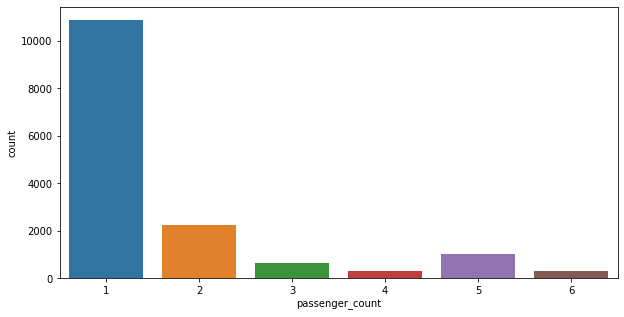

In [59]:
# Count plot on passenger count
plt.figure(figsize=(10,5))
sns.countplot(x="passenger_count", data=train)

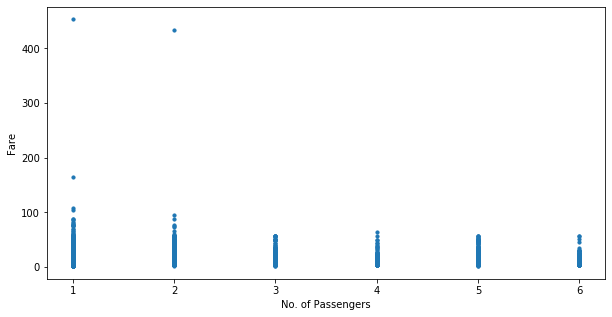

In [60]:
#Relationship beetween number of passengers and Fare
plt.figure(figsize=(10,5))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

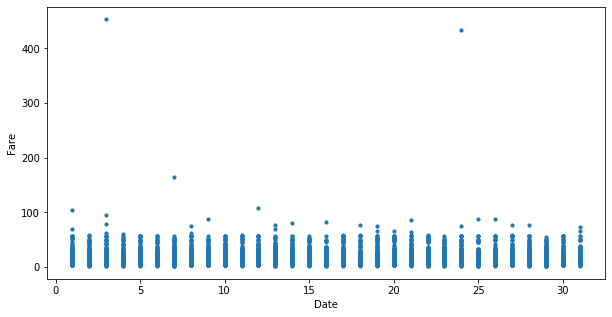

In [61]:
#visualisation between date and Fare
plt.figure(figsize=(10,5))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

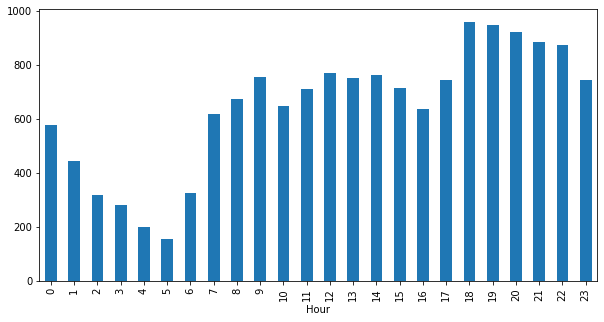

In [62]:
plt.figure(figsize=(10,5))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

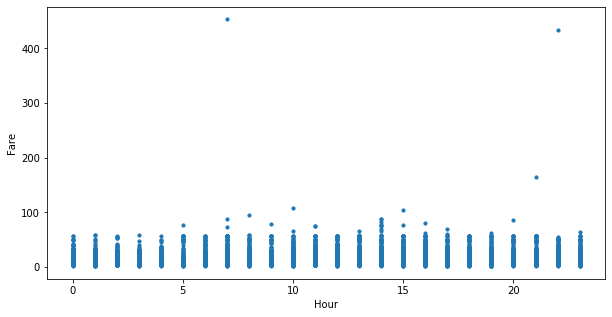

In [63]:
#between Time and Fare
plt.figure(figsize=(10,5))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

Observations :
By seeing the above plots we can easily conclude that:

passenger_count 1 are most frequent travellers and highest Fare are coming from passenger_count 1 and 2.

Lowest cabs at 5 AM and highest around 7 PM i.e the office rush hours

We can observe that the cabs taken at 7 am and 23 Pm are the costliest i.e. that cabs taken early in morning and late at night are costliest

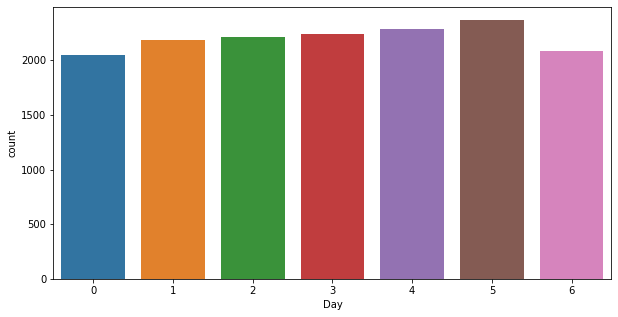

In [64]:
#impact of Day on the number of cab rides
plt.figure(figsize=(10,5))
sns.countplot(x="Day", data=train)

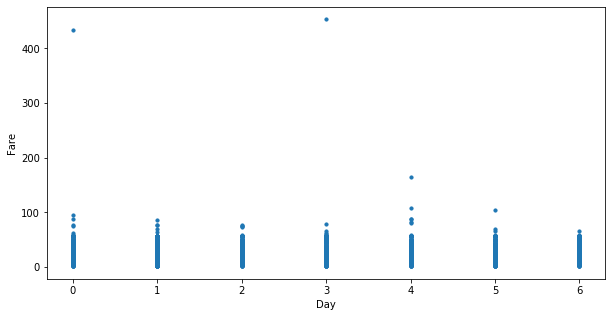

In [65]:
#between day and Fare
plt.figure(figsize=(10,5))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

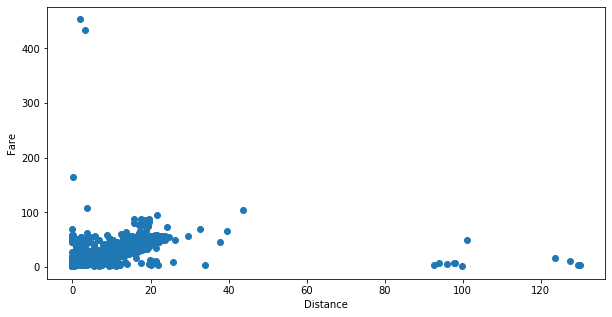

In [66]:
#Relationship between distance and fare 
plt.figure(figsize=(10,5))
plt.scatter(x = train['distance'],y = train['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

Other observations :
The day of the week does not affect the number of cabs ride

and obiviously distance will effect the amount of fare

# Feature Scaling :

fare_amount


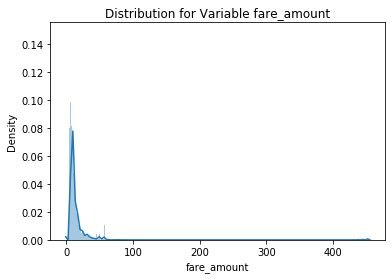

distance


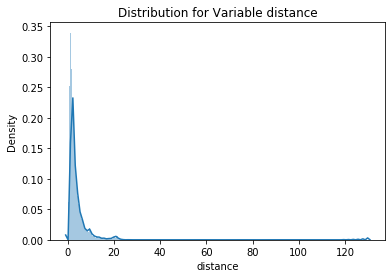

In [67]:
#Normality check of training data  whether the data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [68]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare_amount


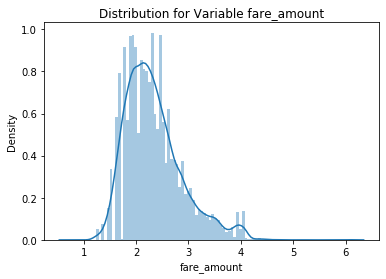

distance


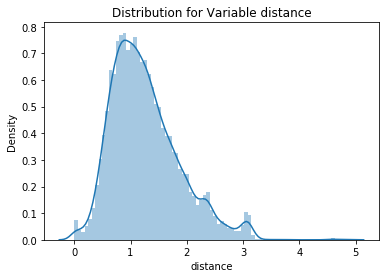

In [69]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

Here we can see bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any Feature Scalling technique. i.e, Normalization or Standarization for our training data

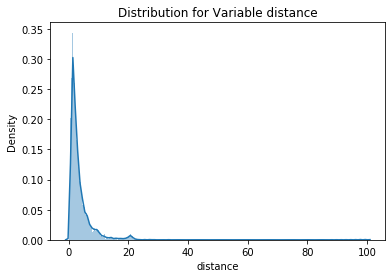

In [70]:
# same thing for test data set
sns.distplot(test['distance'],bins='auto')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [71]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

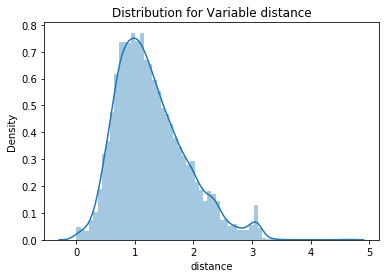

In [72]:
sns.distplot(test['distance'],bins='auto')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

# Now we are done with all the things i.e. data cleaning feature scaling of data its time to apply machine learning algorithm

In [73]:
#For further modelling we will apply train test split
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [74]:
print(X_train.shape)
print(X_test.shape)

(12340, 7)
(3085, 7)


# # starting with Linear Regression Model :

In [75]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

pred_train_LR = fit_LR.predict(X_train)#prediction on train data


pred_test_LR = fit_LR.predict(X_test)#prediction on test data

In [76]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))
print("RMSE for Test data = "+str(RMSE_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))
print("RMSE for Training data = "+str(RMSE_train_LR))

RMSE for Test data = 0.2520060409608864
RMSE for Training data = 0.27479600298109363


In [77]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.7504025344908756

In [78]:
r2_score(y_test, pred_test_LR)

0.7712767629602785

# Decision tree Model :

In [79]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [80]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [81]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))
print("RMSE for Training data = "+str(RMSE_train_DT))
##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))
print("RMSE for Test data = "+str(RMSE_test_DT))

RMSE for Training data = 0.298468720629042
RMSE for Test data = 0.29282531930984523


In [82]:
print(r2_score(y_train, pred_train_DT))
print(r2_score(y_test, pred_test_DT))

0.7055463133444932
0.6911798449442007


# Random Forest Model :

In [83]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [84]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [85]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
print("RMSE for Training data = "+str(RMSE_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))
print("RMSE for Test data = "+str(RMSE_test_RF))

RMSE for Training data = 0.09490300682048686
RMSE for Test data = 0.24537801298844275


In [86]:
print(r2_score(y_train, pred_train_RF)) #train
print(r2_score(y_test, pred_test_RF)) #test

0.9702299685771167
0.7831498752728084


# Gradient Boosting :

In [87]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [88]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [89]:
##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
print("RMSE for Training data = "+str(RMSE_train_GB))

##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))
print("RMSE for Test data = "+str(RMSE_test_GB))

RMSE for Training data = 0.22568473580293086
RMSE for Test data = 0.23562497866814508


In [90]:
print(r2_score(y_test, pred_test_GB))
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.8000455646145797


0.8316458907520048

# Optimizing the results with parameters tuning :

In [91]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [92]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [93]:
##Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.78.
RMSE =  0.24548973005031627


In [94]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [95]:
##Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.76.
RMSE =  0.2594523142353798


In [96]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.79.
RMSE =  0.24388484119477485


In [97]:
## Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.78.
RMSE =  0.24566805924456375


# Prediction of fare from provided test dataset :
We have already cleaned and processed our test dataset along with our training dataset. Hence we will be predicting using grid search CV for random forest model

In [98]:
  
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test)

In [99]:
predictions_GRF_test_Df

array([2.37502568, 2.3900969 , 1.68433541, ..., 4.01414916, 2.99430239,
       2.01080526])

In [100]:
test['Predicted_fare'] = predictions_GRF_test_Df

In [101]:
test.to_csv('test.csv')

In [103]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,1.200946,2.375026
1,1,2015,1,27,1,13,1.231205,2.390097
2,1,2011,10,8,5,11,0.481579,1.684335
3,1,2012,12,1,5,21,1.085538,2.165278
4,1,2012,12,1,5,21,1.854312,2.844692
